In [8]:
#import the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#loading the dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
#checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
#checking for the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
#summary statistics for the datafram
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
#correlation for the feature variable and target variables
corr_matrix=df.select_dtypes(include='number').corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Data Exploration

In [13]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [14]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Visualization of the Data

<function matplotlib.pyplot.show(close=None, block=None)>

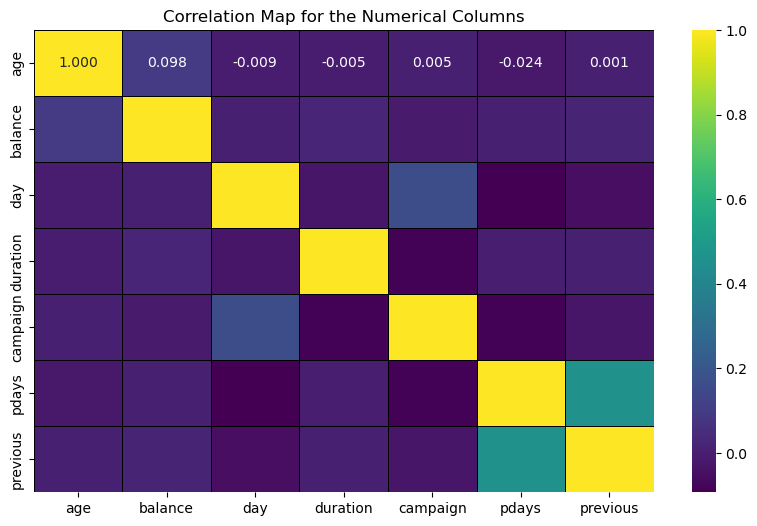

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='viridis',annot=True, linewidths=0.5,linecolor='black',fmt='.3f')
plt.title('Correlation Map for the Numerical Columns')
plt.show

There is no significant correlation in the variables

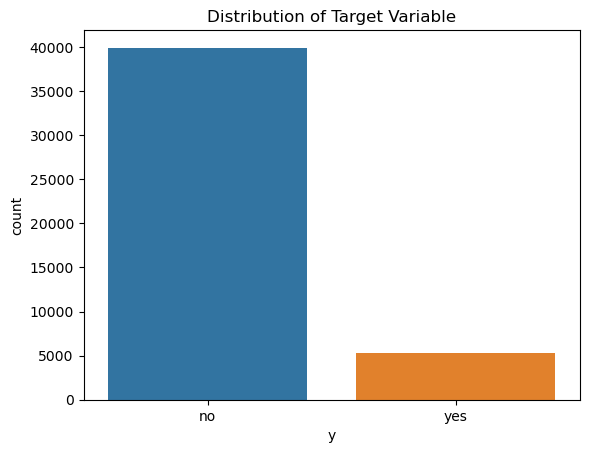

In [21]:
# Bar plot of target classes
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

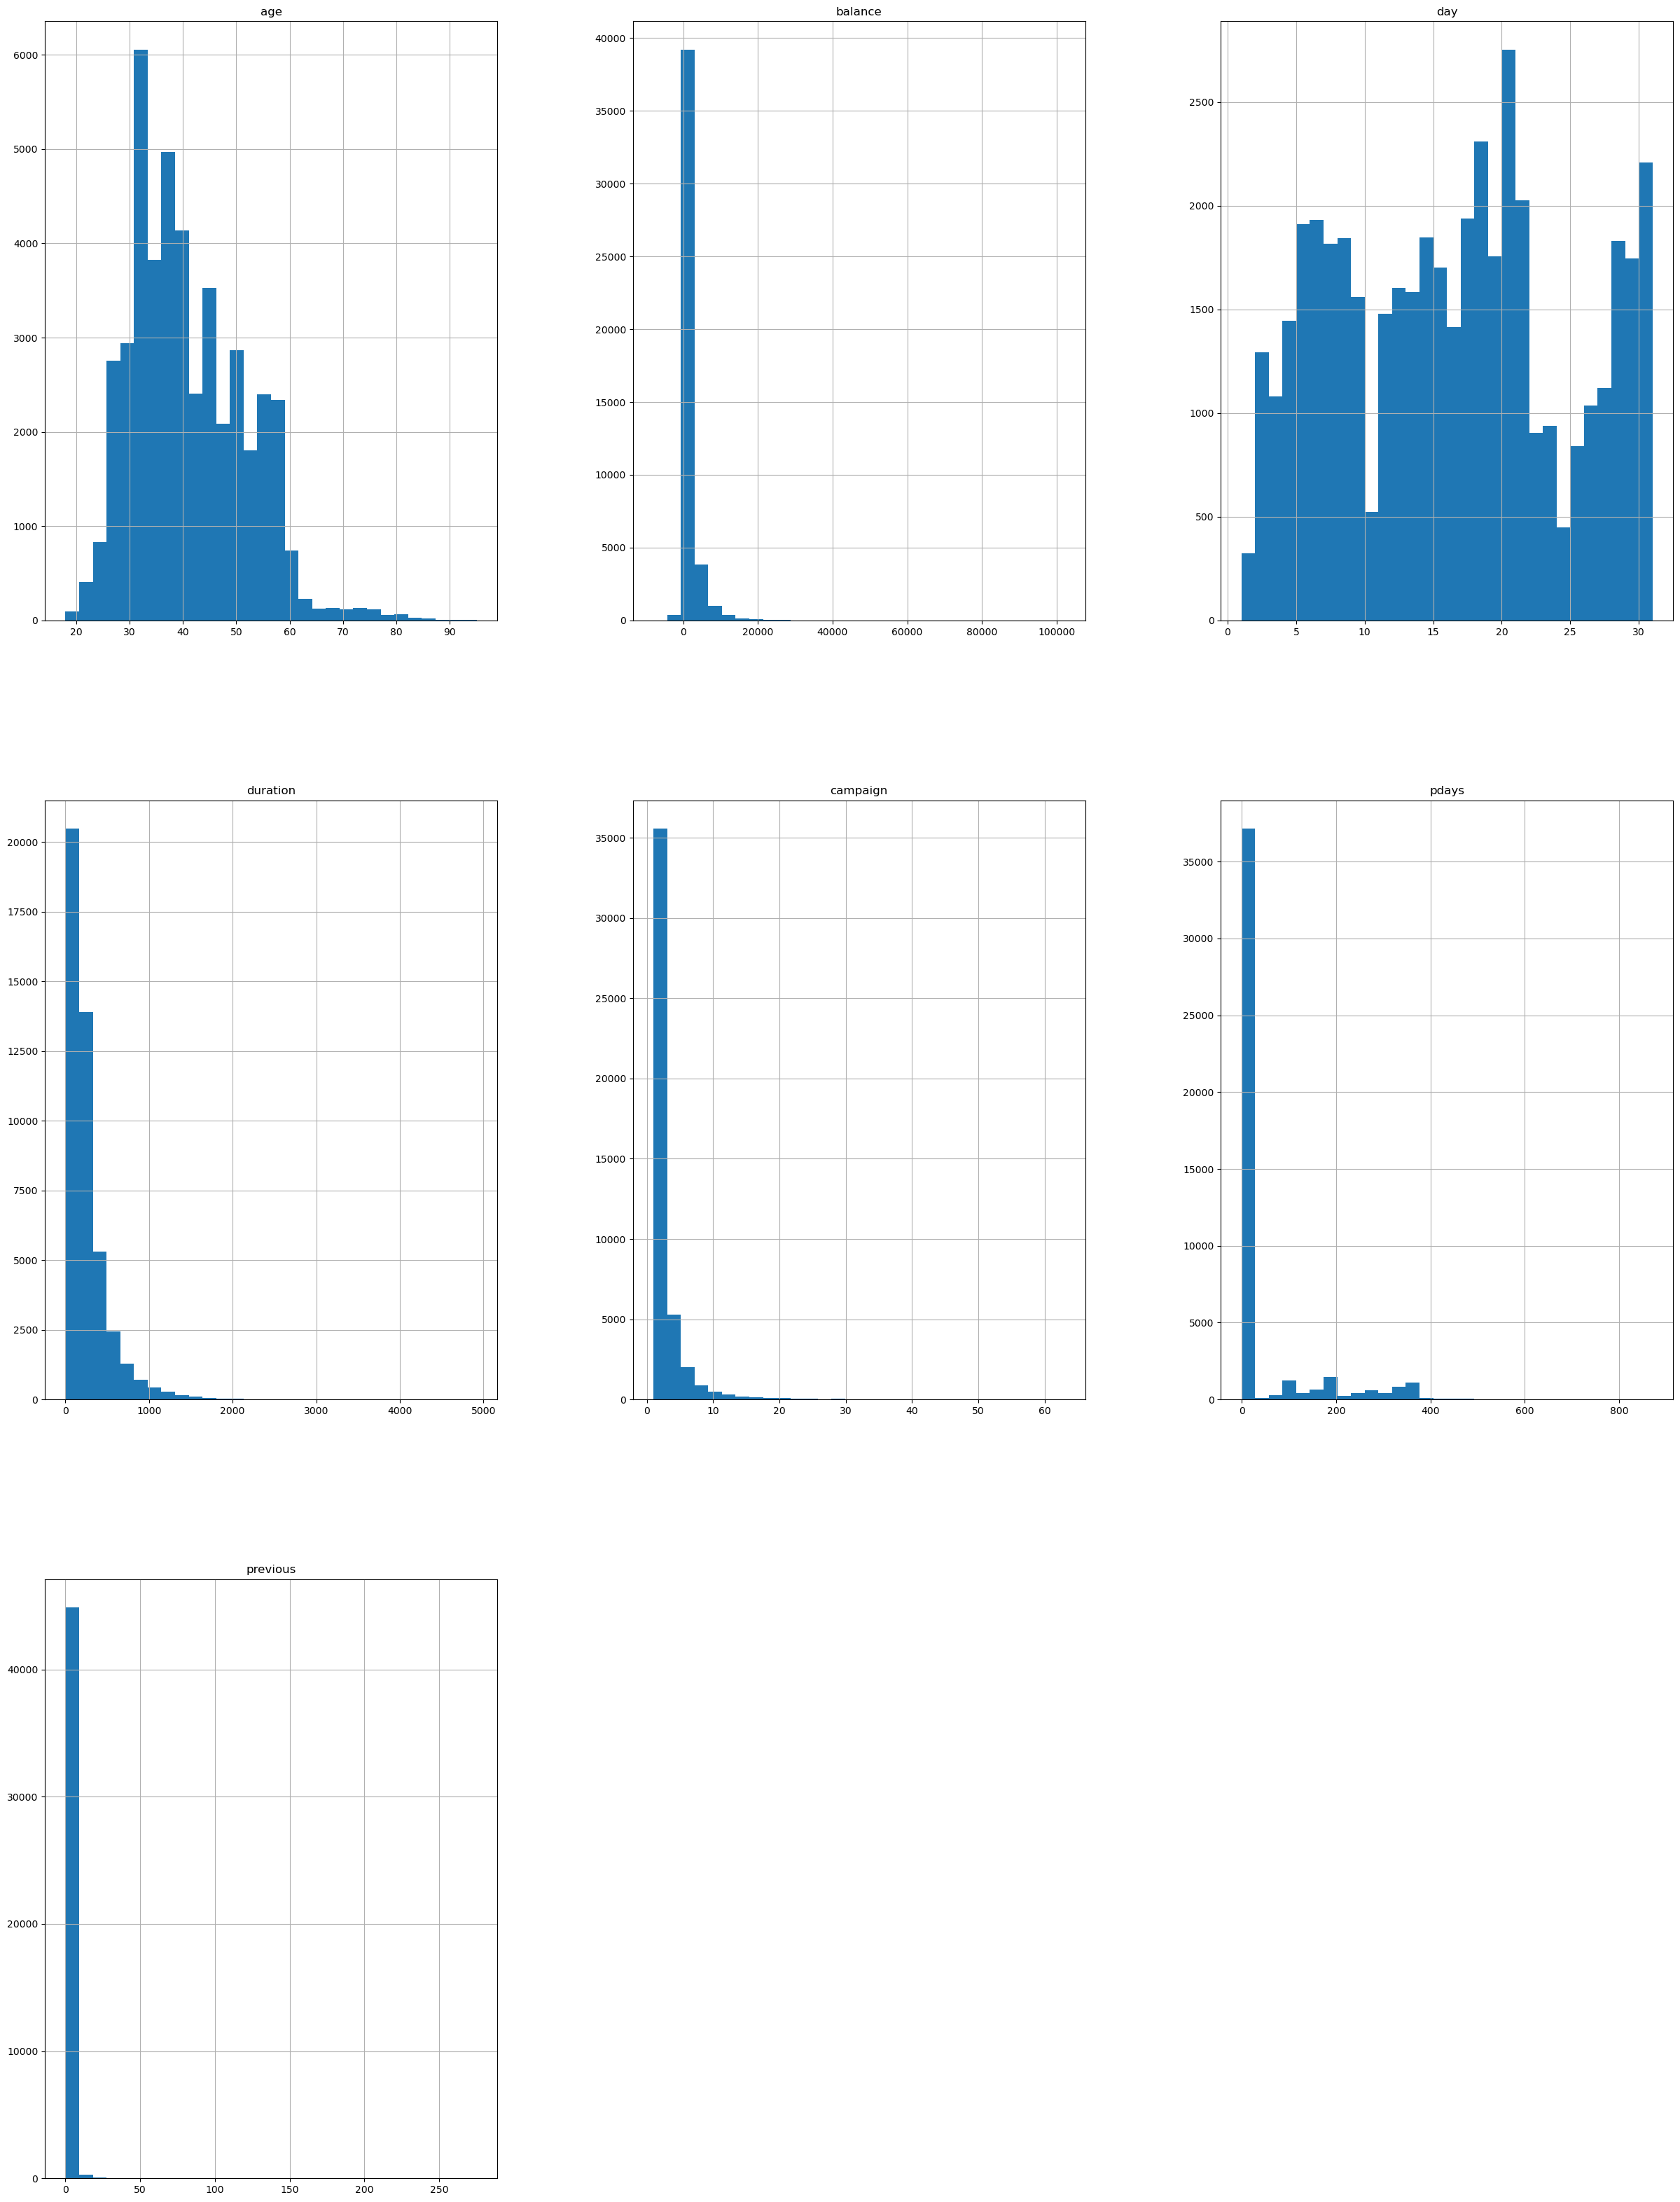

In [22]:
#Histgram for the numerical coulumns
df.hist(bins=30,figsize=(30,40))

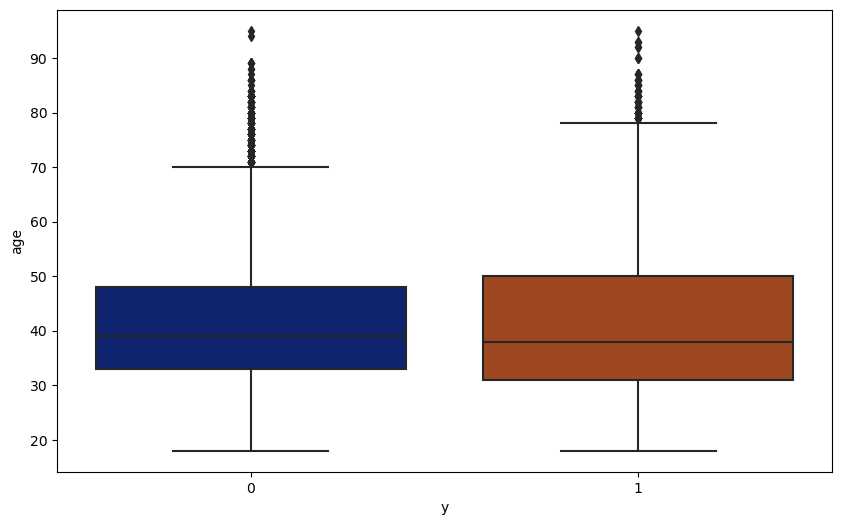

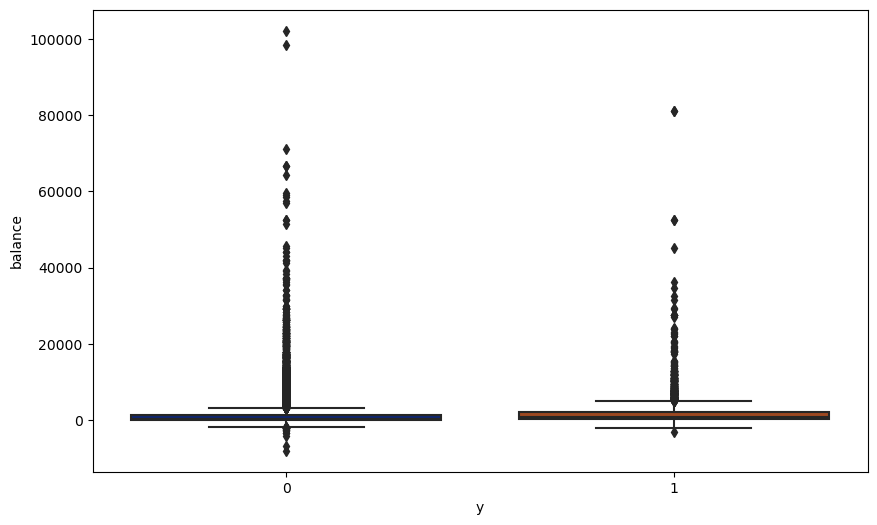

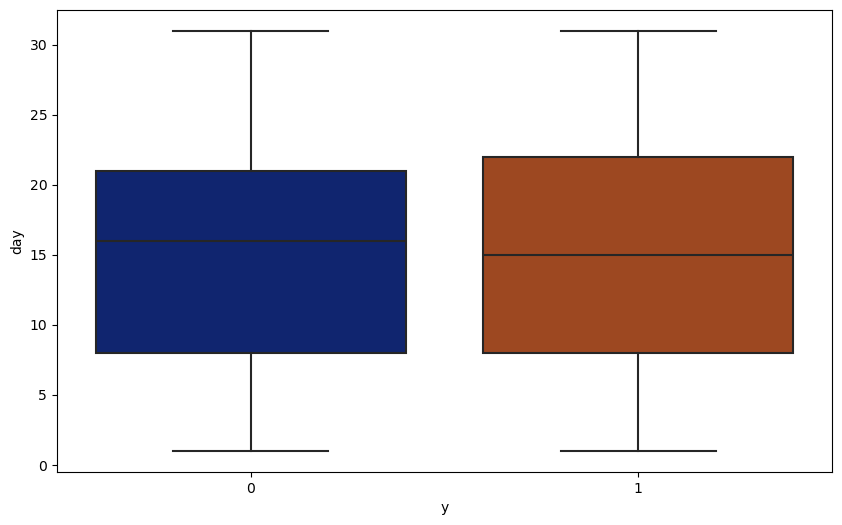

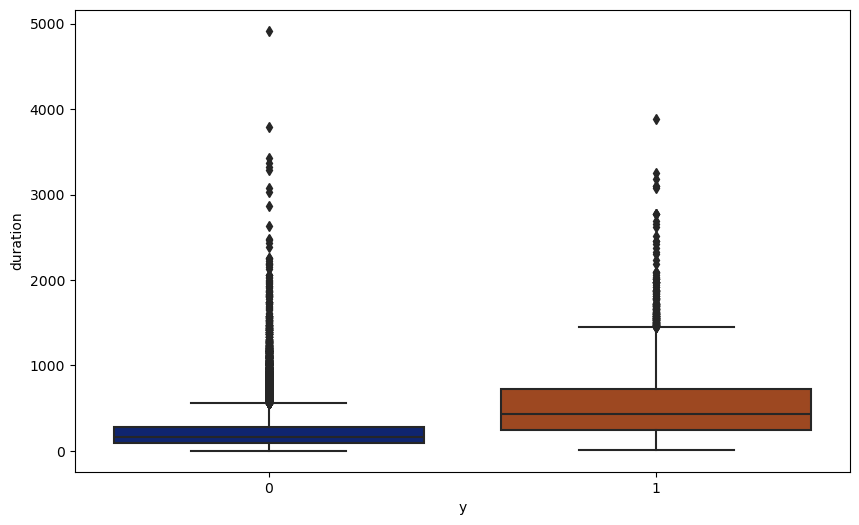

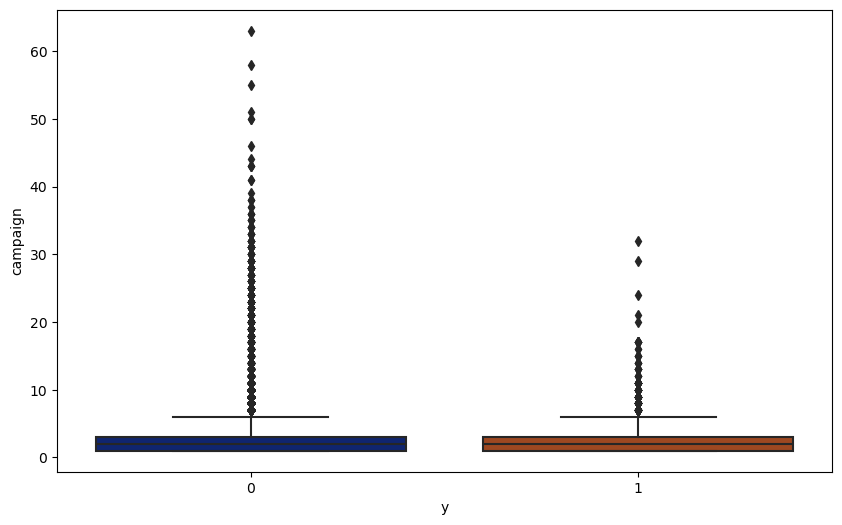

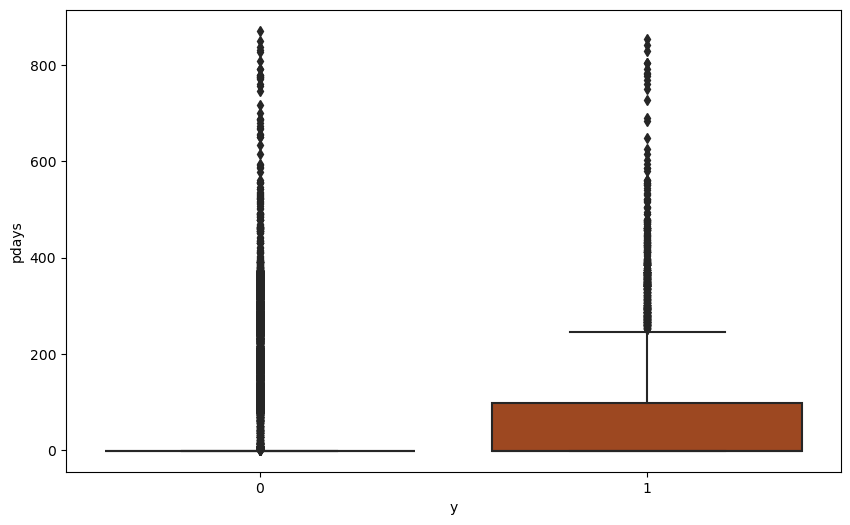

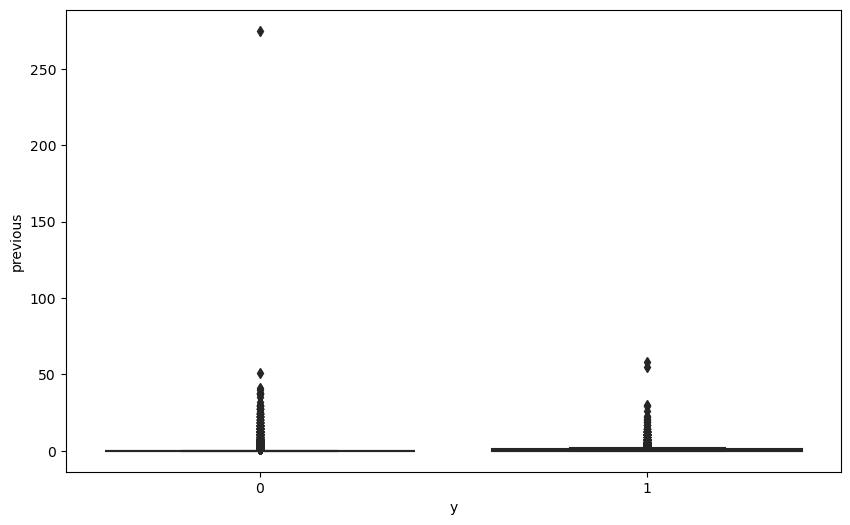

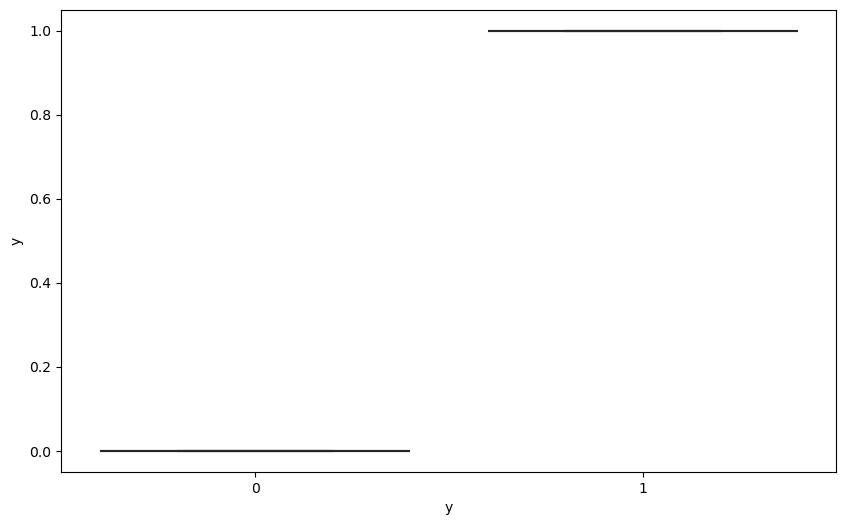

In [62]:
df_num =df[[ 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']]
for col in df_num:
    plt.figure(figsize=(10,6))
    sns.boxplot(x = 'y' , y = col, data =df , palette = 'dark')
    plt.show()

Preprocessing the Data

In [24]:
#convert the target column 'y' to binary
df['y']=df['y'].map({'yes':1,'no':0})

#applying one-hot encoding for categorical columns
df=pd.get_dummies(df,drop_first=True)

# Convert True/False to 1/0 for the entire DataFrame
df = df.astype(int)


In [26]:
#new dataframe
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [30]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
#selecting numerical columns to scale
num_col=['age','balance','duration','campaign','previous','pdays']
scaler=StandardScaler()
scaler_df=scaler.fit_transform(df[num_col])

In [29]:
df.select_dtypes(include='number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [35]:
df

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

Data Separation and Splitting

In [36]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('y', axis=1)  
y = df['y']  

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [44]:
X_train.shape

(36168, 42)

In [45]:
y_train.shape

(36168,)

Model Building

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

#training the model using training data
lr.fit(X_train,y_train)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Making Predictions

In [47]:
#predicting the test data
y_pred=lr.predict(X_test)

Model Evaluation

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
#classification report
print(classification_report(y_test,y_pred))

#confusion matrix
print(confusion_matrix(y_test,y_pred))

#f1 score
print('f1_Score:',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.52      0.17      0.25      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.57      0.59      9043
weighted avg       0.85      0.88      0.86      9043

[[7826  159]
 [ 883  175]]
f1_Score: 0.2514367816091954


In [51]:
#model building using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#training the model using training data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
#predicting the test data
y_pred=rf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
#classification report
print(classification_report(y_test,y_pred))

#confusion matrix
print(confusion_matrix(y_test,y_pred))

#f1 score
print('f1_Score:',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.91      0.90      9043

[[7776  209]
 [ 636  422]]
f1_Score: 0.4997039668442866


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)

# Train the model on the balanced dataset
rf = RandomForestClassifier()
rf.fit(x_smote, y_smote)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the results
print(classification_report(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7985
           1       0.59      0.51      0.55      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.73      0.75      9043
weighted avg       0.90      0.90      0.90      9043

F1 Score: 0.5483870967741936


1. Overview:
The goal of this model is to predict whether a customer will subscribe to a term deposit (yes or no). The data has an imbalanced class distribution, where most customers (0) do not subscribe to a term deposit, while only a small proportion (1) does.

The three models used were:

Logistic Regression
Random Forest
Random Forest with SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE was applied to address the class imbalance issue by generating synthetic samples for the minority class (1).

2. Logistic Regression Results:
Accuracy: 88%

The model is 88% accurate in predicting whether customers will subscribe or not.
Class 0 (No Subscription)

Precision: 90%, Recall: 98%, F1-score: 94%
The model performs very well in predicting customers who will not subscribe. High recall (98%) means it correctly identifies almost all of the customers who won’t subscribe.
Class 1 (Subscription)

Precision: 52%, Recall: 17%, F1-score: 25%
However, for predicting those who will subscribe, the model performs poorly, with only 17% of actual subscribers being correctly identified.
Conclusion:

Logistic regression heavily favors the majority class (customers who don’t subscribe). While it is good at predicting "No" (Class 0), it struggles with identifying actual subscribers (Class 1). This is a concern if we aim to target potential subscribers.
3. Random Forest Results:
Accuracy: 91%

The model performs better, achieving 91% accuracy.
Class 0 (No Subscription)

Precision: 92%, Recall: 97%, F1-score: 95%
It continues to perform very well in predicting non-subscribers, correctly identifying most customers who will not subscribe.
Class 1 (Subscription)

Precision: 67%, Recall: 40%, F1-score: 50%
Random Forest performs better than logistic regression in identifying actual subscribers, correctly predicting 40% of subscribers, but still leaves a significant portion unaccounted for.
Conclusion:

Random forest improves the balance between the two classes, but it still favors non-subscribers. The recall for Class 1 (40%) is a noticeable improvement, making this a better option if more accurate predictions of potential subscribers are important.
4. Random Forest with SMOTE Results:
Accuracy: 90%

This model maintains a high accuracy of 90%.
Class 0 (No Subscription)

Precision: 94%, Recall: 95%, F1-score: 94%
It continues to perform well on non-subscribers.
Class 1 (Subscription)

Precision: 59%, Recall: 51%, F1-score: 55%
The model performs better at identifying actual subscribers, with recall increasing to 51%. The F1-score for Class 1 is now 55%, reflecting a better balance between precision and recall for identifying subscribers.
Conclusion:

Applying SMOTE helps the model better capture potential subscribers, raising the recall for Class 1 to 51%. This means the model is identifying more subscribers than before. It’s a good compromise between accuracy and identifying actual customers interested in subscribing.